# Weather predictions model


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


**Reading dataset**

In [2]:
data = pd.read_csv("C:/Users/Dwarkadhish Kamthane/Desktop/Machiene Learning/Weather Pred/weather dataset/seattle-weather.csv")
data.shape

(1461, 6)

**Exploring the Information**


In [3]:
data.info


<bound method DataFrame.info of             date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]>

**Checking for null values if any**

In [4]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
data.head(5)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
import sklearn as scikit_learn
from sklearn.preprocessing import LabelEncoder

**Fill missing values with column mean**

In [7]:
data.fillna(data.mean(), inplace=True)  



C:\Users\Dwarkadhish Kamthane\AppData\Local\Temp\ipykernel_6664\133334000.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [8]:
print(data["weather"].value_counts())

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64


**Drizzle -> 0
Rain -> 1
Sun -> 2
Snow -> 3
Fog -> 4**

In [9]:
label_encoder = LabelEncoder()
data["weather"] = label_encoder.fit_transform(data["weather"])

In [10]:
print(data)

            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7        0
1     2012-01-02           10.9      10.6       2.8   4.5        2
2     2012-01-03            0.8      11.7       7.2   2.3        2
3     2012-01-04           20.3      12.2       5.6   4.7        2
4     2012-01-05            1.3       8.9       2.8   6.1        2
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9        2
1457  2015-12-28            1.5       5.0       1.7   1.3        2
1458  2015-12-29            0.0       7.2       0.6   2.6        1
1459  2015-12-30            0.0       5.6      -1.0   3.4        4
1460  2015-12-31            0.0       5.6      -2.1   3.5        4

[1461 rows x 6 columns]


**here x will be attributes and y will be the target**

In [11]:

X = data[["precipitation" , "temp_max" , "temp_min", "wind" ]]
y = data[["weather"]]

**Splitting the testing and training data**

In [12]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 42) 

In [13]:
print(X_train)
print(y_train)

      precipitation  temp_max  temp_min  wind
1066            0.0       5.6      -3.2   5.7
638            18.5      13.9      10.0   6.3
799            18.8      12.2       6.1   2.2
380             0.0       6.7      -0.6   2.3
303            34.5      15.0      12.2   2.8
...             ...       ...       ...   ...
1130            8.4      10.6       4.4   1.7
1294            0.0      33.3      17.8   3.4
860             0.5      15.6       7.2   2.1
1459            0.0       5.6      -1.0   3.4
1126            0.0       7.2       3.3   1.9

[1168 rows x 4 columns]
      weather
1066        1
638         2
799         2
380         4
303         2
...       ...
1130        2
1294        4
860         2
1459        4
1126        1

[1168 rows x 1 columns]


**Applying Random Forest Classifier**

In [14]:
from sklearn.ensemble import RandomForestClassifier

bot = RandomForestClassifier( n_estimators = 100 , random_state = 42)

In [15]:
bot.fit(X_train , y_train)

C:\Users\Dwarkadhish Kamthane\AppData\Local\Temp\ipykernel_6664\1364689924.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  bot.fit(X_train , y_train)


RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import accuracy_score

**Finding the accuracy of the model**

In [17]:
y_pred = bot.predict(X_test)
accuracy = accuracy_score(y_test , y_pred)
print(f"Accuracy of a Model: {accuracy:.2f}")

Accuracy of a Model: 0.82


In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


**Plotting confusion matrix for the trained model**

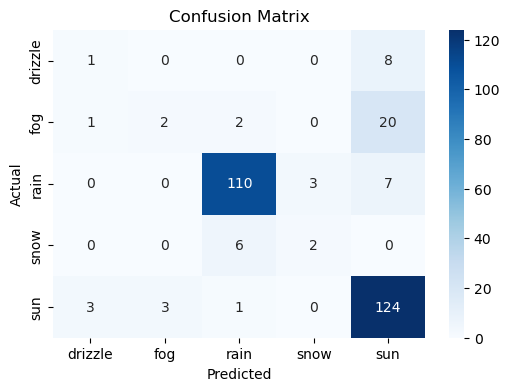

In [19]:
mat = confusion_matrix(y_test , y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Checking the Prictions with inpute3d sample data**

In [20]:
sample_data = [[0.0,12.8,5.0,4.7]]  
predicted_weather = bot.predict(sample_data)
weather_label = label_encoder.inverse_transform(predicted_weather)
print(f"Predicted Weather Condition: {weather_label[0]}")

Predicted Weather Condition: drizzle


C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
diff = np.array(y_test) - np.array(y_pred)
diff

array([[ 0,  2,  2, ...,  0,  2,  0],
       [-2,  0,  0, ..., -2,  0, -2],
       [-2,  0,  0, ..., -2,  0, -2],
       ...,
       [-3, -1, -1, ..., -3, -1, -3],
       [-2,  0,  0, ..., -2,  0, -2],
       [ 0,  2,  2, ...,  0,  2,  0]])

**Plotting graph of the target and predicted target for analysis and further improvements**

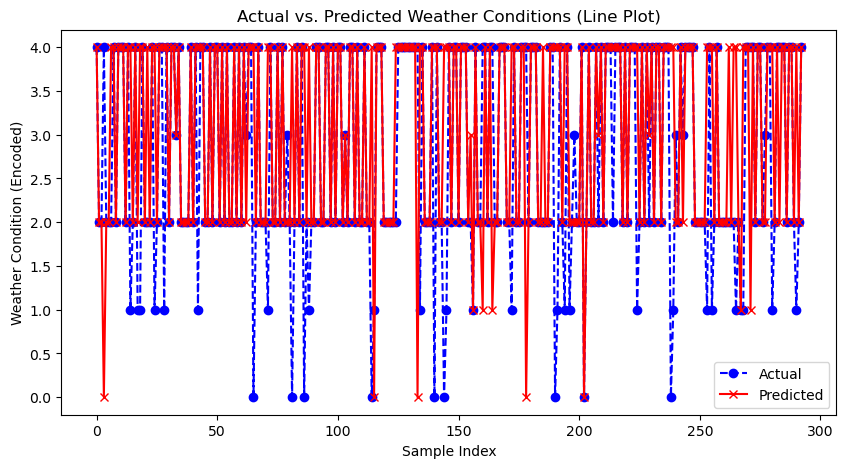

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", color="blue", linestyle="--", marker="o")
plt.plot(y_pred, label="Predicted", color="red", linestyle="-", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Weather Condition (Encoded)")
plt.title("Actual vs. Predicted Weather Conditions (Line Plot)")
plt.legend()
plt.show()


**Trying out other machine learning models to improve the accuracy**

In [23]:
from xgboost import XGBClassifier
bot = XGBClassifier()
bot.fit(X_train , y_train)
y_pred = bot.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test , y_pred)
print(f"Accuracy of a Model: {accuracy:.2f}")

Accuracy of a Model: 0.81


**Accuracy went down using XGB classifier**


In [25]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
accuracy = accuracy_score(y_test , y_pred)
print(f"Accuracy of a Model: {accuracy:.2f}")

Accuracy of a Model: 0.76


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [30]:
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.74
              precision    recall  f1-score   support

     drizzle       0.33      0.11      0.17         9
         fog       0.38      0.20      0.26        25
        rain       0.81      0.83      0.82       120
        snow       1.00      0.12      0.22         8
         sun       0.72      0.84      0.78       131

    accuracy                           0.74       293
   macro avg       0.65      0.42      0.45       293
weighted avg       0.72      0.74      0.72       293

